## ADM - Homework 2 - Steam Reviews ##

- Camilla Lombardi 1794467
- Alice Palmucci 1836723
- Aruzhan Kakibay


**Libraries**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import scipy.stats
import seaborn as sns
from IPython.display import display, Math, Latex
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [4]:
data_original = pd.read_csv('./steam_reviews.csv', header='infer',
                       parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], 
                      date_parser=dateparse)

#### RQ 1 - Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyze datasets to summarize their main characteristics. 
We will start by looking at the dataset: checking the dimensions, the features, missing values. 

Lets see basic information regarding the dataset

In [5]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      int64         
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 

### Dataset consist of 23 columns:
1. app_id – the application unique identification number
2. app_name – the name of the game
3. review_id – unique identity of review
4. language – language used in review
5. review – the actual review
6. timestamp_created – date the review was created (unixtimestamp)
7. timestamp_updated – date the review was last updated (unix timestamp)
8. recommended – true means it was a positive recommendation
9. votes_helpful – the number of users that found this review helpful
10. votes_funny – the number of users that found this review funny
11. weighted_vote_score – helpfulness score
12. comment_count – number of comments posted on this review
13. steam_purchase – true if the user purchased the game on Steam
14. received_for_free – true if the user checked a box saying they got the app for free
15. written_during_early_access – true if the user posted this review while the game was in Early Access
16. Author fields:
17. steamid – the user’s SteamID
18. num_games_owned – number of games owned by the user
19. num_reviews – number of reviews written by the user
20. playtime_forever – lifetime playtime tracked in this app
21. playtime_last_two_weeks – playtime tracked in the past two weeks for this app
22. playtime_at_review – playtime when the review was written
23. last_played – time for when the user last played

In [6]:
data_original.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [7]:
data_original.shape

(21747371, 23)

We will know check if there are missing values in the dataset, and depending on in which features we find them, we will decide how to manage them..

In [8]:
data_original.isnull().sum() #if 0 no problem

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

With this method, we count how many missing values there are for each feature.
In this dataset, the missing values are in the following features:
1. Review
2. author.playtime_forever
3. author.playtime_last_two_weeks
4. author.playtime_at_review
5. author.last_played     

Now, we believe that the column "review" can't be replaced, so we decided to drop all the rows where te feature review is missing.
For the remaining features we could replace the missing values with the average value for that feature, but since the number of missing values is so small with respect to the number of observation, we decided to drop also these rows, since it would not affect our further analysis.

In [9]:
data=data_original.dropna(axis=0)
data

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,2020-04-11 17:56:56
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,2021-01-19 18:17:11
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,2020-06-08 16:29:13
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,2020-05-17 11:36:55


In [10]:
data.shape

(21687951, 23)

We decided to continue with some UNIVARIATE ANALYSIS..

We thought it could be interesting to see how many applications we are talking about, and how many reviewers, and how ,any languages are used we have in this dataset.

In [11]:
print(len(data['app_name'].unique()))

315


In [12]:
print(len(data['author.steamid'].unique()))

12381952


In [13]:
print(len(data['language'].unique()))

28


We can conclude that in this dataset we have 315 applications that have been reviewed, 12.381.952 reviewers and 28 different languages.

Further on we create a dataset of the quantitatives features that we believe that it could be helpful to analyze. We apply the function describe to show the most important statistics on thiese values.

In [14]:
df_quant=pd.DataFrame(columns=['votes_helpful','votes_funny','weighted_vote_score', 'author.num_games_owned',
                               'author.num_review','author.playtime_forever','author.playtime_last_two_weeks',
                               'author.playtime_at_review'])
df_quant['votes_helpful']=data['votes_helpful']
df_quant['votes_funny']=data['votes_funny']
df_quant['weighted_vote_score']=data['weighted_vote_score']
df_quant['author.num_games_owned']=data['author.num_games_owned']
df_quant['author.num_review']=data['author.num_reviews']
df_quant['author.playtime_forever']=data['author.playtime_forever']
df_quant['author.playtime_last_two_weeks']=data['author.playtime_last_two_weeks']
df_quant['author.playtime_at_review']=data['author.playtime_at_review']
df_quant

,votes_helpful,votes_funny,weighted_vote_score,author.num_games_owned,author.num_review,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
0,0,0,0.000000,6,2,1909.0,1448.0,1909.0
1,0,0,0.000000,30,10,2764.0,2743.0,2674.0
2,0,0,0.000000,5,1,1061.0,1061.0,1060.0
3,0,0,0.000000,5,3,5587.0,3200.0,5524.0
4,0,0,0.000000,7,4,217.0,42.0,217.0
...,...,...,...,...,...,...,...,...
21747366,0,0,0.000000,431,7,432.0,0.0,29.0
21747367,0,0,0.000000,70,10,3296.0,15.0,24.0
21747368,0,0,0.474138,79,17,2654.0,0.0,34.0
21747369,0,0,0.386022,140,3,210.0,0.0,12.0


In [15]:
pd.set_option('float_format', '{:f}'.format)

In [16]:
df_quant.describe()

,votes_helpful,votes_funny,weighted_vote_score,author.num_games_owned,author.num_review,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,21687951.000000,21687951.000000,21687951.000000,21687951.000000,21687951.000000,21687951.000000,21687951.000000,21687951.000000
mean,405577.004896,126743.035390,0.165526,1014070.486105,405585.624578,16110.456605,155.589391,8809.662749
std,1335566582.515957,23331044.843658,0.243449,2111716038.531129,1335566582.671088,37454.278118,730.109973,23892.158280
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,22.000000,2.000000,1253.000000,0.000000,559.000000
50%,0.000000,0.000000,0.000000,61.000000,4.000000,4315.000000,0.000000,1881.000000
75%,1.000000,0.000000,0.482914,146.000000,10.000000,14938.000000,0.000000,6825.000000
max,4398046511106.000000,4294967295.000000,0.995987,4398046511619.000000,4398046511108.000000,3744943.000000,27039.000000,3228103.000000


From the output we see that all the variables have a strange value for the maximum. 

We continue our Exploratory Data Analysis by showing some of the distribution of the variables, that we consider important. 

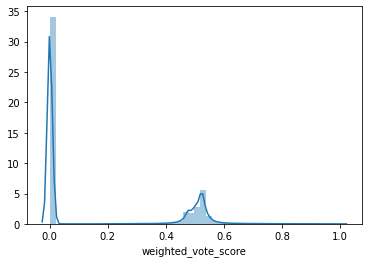

In [17]:
#let see the distribution of variables
sns.distplot(data['weighted_vote_score'])

The plot above shows the distriburion of the feature *weighted vote score*. We can say that most of the time this feature has value 0; and that some other frequent values that it assumes are between 0.4 and 0.6, with a point in 0.5. This is in line with what the feature *weighted vote score* is. 

Now, we would like to see how many apps have been purchased on steam, and how many have been purchased.

In [18]:
plot_df_apps=pd.DataFrame(columns= ['steam_purchase', 'received_free'])
plot_df_apps['steam_purchase']=data['steam_purchase']
plot_df_apps['received_free']=data['received_for_free']
plot_df_apps

,steam_purchase,received_free
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
21747366,True,False
21747367,False,False
21747368,True,False
21747369,True,False


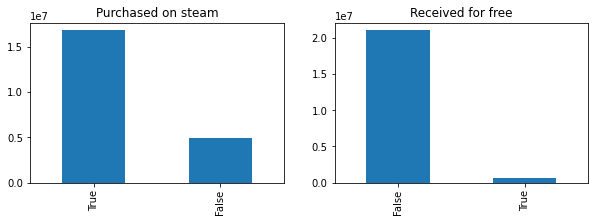

In [19]:
fig_app = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

# Plot accidents depending on type
plt.subplot2grid(fig_dims, (0, 0))
plot_df_apps['steam_purchase'].value_counts().plot(kind='bar', 
                                             title='Purchased on steam')
plt.subplot2grid(fig_dims, (0, 1))
plot_df_apps['received_free'].value_counts().plot(kind='bar', 
                                             title='Received for free')


<Figure size 432x288 with 0 Axes>

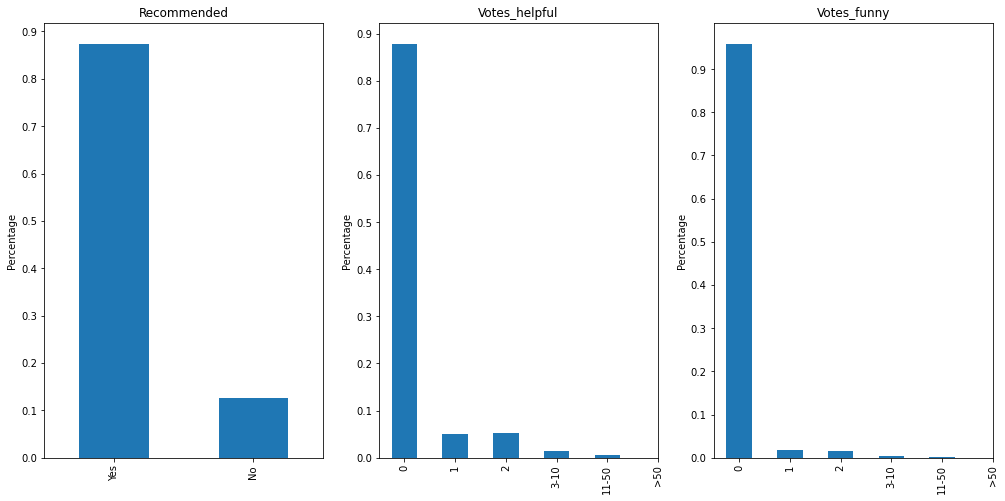

In [22]:
recomm_amount = data["recommended"].value_counts()
recomm_amount = recomm_amount/sum(recomm_amount)


helpful=data["votes_helpful"].value_counts()
my_bins=[0,1,2,10,50,max(helpful)]
out=pd.cut(data["votes_helpful"],bins=my_bins,include_lowest=True)
ax=out.value_counts(sort=False)
ax=ax/sum(ax)
#print(ax)

funny=data["votes_funny"].value_counts()
my_bins=[0,1,2,10,50,max(funny)]
out2=pd.cut(data["votes_funny"],bins=my_bins,include_lowest=True)
bx=out2.value_counts(sort=False)
bx=bx/sum(bx)
#print(bx)



plt.figure()
fig=plt.figure(figsize=(17,8))
plt.subplot(131)
recomm_amount.plot.bar(
    title='Recommended',
ylabel='Percentage',)
plt.yticks(np.arange(0,1,0.1))
plt.xticks([0,1],['Yes','No'])

plt.subplot(132)
ax.plot.bar(title="Votes_helpful",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5],['0','1','2','3-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.subplot(133)
bx.plot.bar(title="Votes_funny",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5],['0','1','2','3-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.show()

It could also be interesting to study the behaviour of the authors regarding the update of their reviews. We compute the time it passes between the creation and the update of a review and analyze the most important statistics.  

In [23]:
duration=data['timestamp_updated']-data['timestamp_created']
duration

0           0 days 00:00:00
1           0 days 00:00:00
2           0 days 00:00:00
3           0 days 00:00:00
4           0 days 00:00:00
                 ...       
21747366    0 days 00:00:00
21747367    0 days 00:00:00
21747368    0 days 00:00:00
21747369   16 days 03:43:11
21747370   81 days 21:04:55
Length: 21687951, dtype: timedelta64[ns]

In [24]:
duration.describe()

count                       21687951
mean      36 days 04:59:57.478384160
std      179 days 04:45:07.656314762
min                -1 days +23:59:56
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max               8069 days 20:08:16
dtype: object

By analyzing the basic statistics we observe that most of the values is 0, since the third quantile is 0. This means that most of the time the review written in first place will not be updated. 

Our Exploratory Data Analysis continues with BIVARIATE ANALYSIS. The aim of this is to check if there are relationships between some features and their behaviour.

In [25]:
playtime_review=data['author.playtime_at_review']
wvs=data['weighted_vote_score']
playtime_twoweeks=data['author.playtime_last_two_weeks']
playtime_ever=data['author.playtime_forever']

In [26]:
play_wvs=pd.DataFrame(columns=['playtime_review','wvs', 'playtime_twoweeks', 'playtime_ever'])
play_wvs['playtime_review']=playtime_review
play_wvs['wvs']=wvs
play_wvs['playtime_twoweeks']=playtime_twoweeks
play_wvs['playtime_ever']=playtime_ever
play_wvs


,playtime_review,wvs,playtime_twoweeks,playtime_ever
0,1909.000000,0.000000,1448.000000,1909.000000
1,2674.000000,0.000000,2743.000000,2764.000000
2,1060.000000,0.000000,1061.000000,1061.000000
3,5524.000000,0.000000,3200.000000,5587.000000
4,217.000000,0.000000,42.000000,217.000000
...,...,...,...,...
21747366,29.000000,0.000000,0.000000,432.000000
21747367,24.000000,0.000000,15.000000,3296.000000
21747368,34.000000,0.474138,0.000000,2654.000000
21747369,12.000000,0.386022,0.000000,210.000000


In [27]:
play_wvs_corr=play_wvs.corr()
play_wvs_corr

,playtime_review,wvs,playtime_twoweeks,playtime_ever
playtime_review,1.000000,0.009896,0.246081,0.833586
wvs,0.009896,1.000000,-0.022257,0.046574
playtime_twoweeks,0.246081,-0.022257,1.000000,0.357940
playtime_ever,0.833586,0.046574,0.357940,1.000000


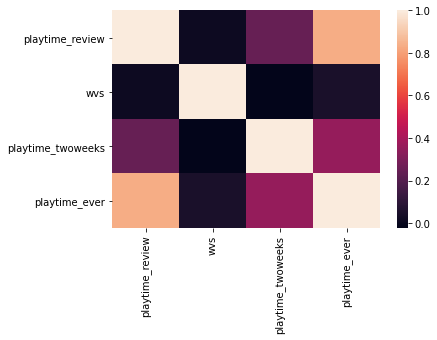

In [28]:
sns.heatmap(play_wvs_corr)

We thought it would be interesting to analyze the relationship between the playtime of the author and the *weighted vote score*. In this heat map we can see that there is a high correlation between the *playtime_ever* (so the time each author spent playing at the game) and the *playtime_review* which is the amount of time the author played at the game before writing the review. This could be interpret as the fact that most of the authors just play at the game for the purpose of writing the review.

Another fact to highlight is the negative correlation between *playtime_twoweeks* and the *weighted vote score*; in general from this heatmap we can affirm that there is no correlation between the time spent by the author playing the game and the weighted vote score.

### RQ 2 - Let's explore the dataset by finding simple insights into the reviews.

#### RQ 2.1 - NUMBER OF REVIEWS FOR EACH APP

In [29]:
n_reviews_per_app=data['app_name'].value_counts()

/Users/camilla/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camilla/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camilla/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camilla/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camilla/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/camilla/opt/anaconda3/lib/python3.8/site-package

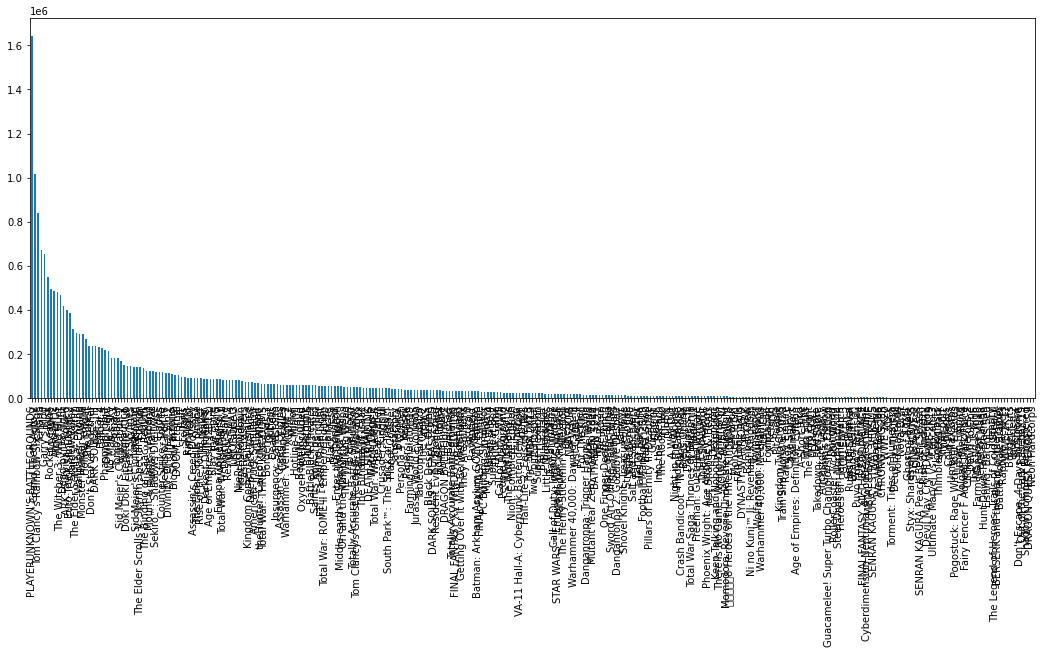

In [30]:
n_reviews_per_app.plot.bar(figsize=(18,7))

Since this plot is unreadable due to the very high number of applications, we decide to plot also the top50 apps with the most number of reviews.

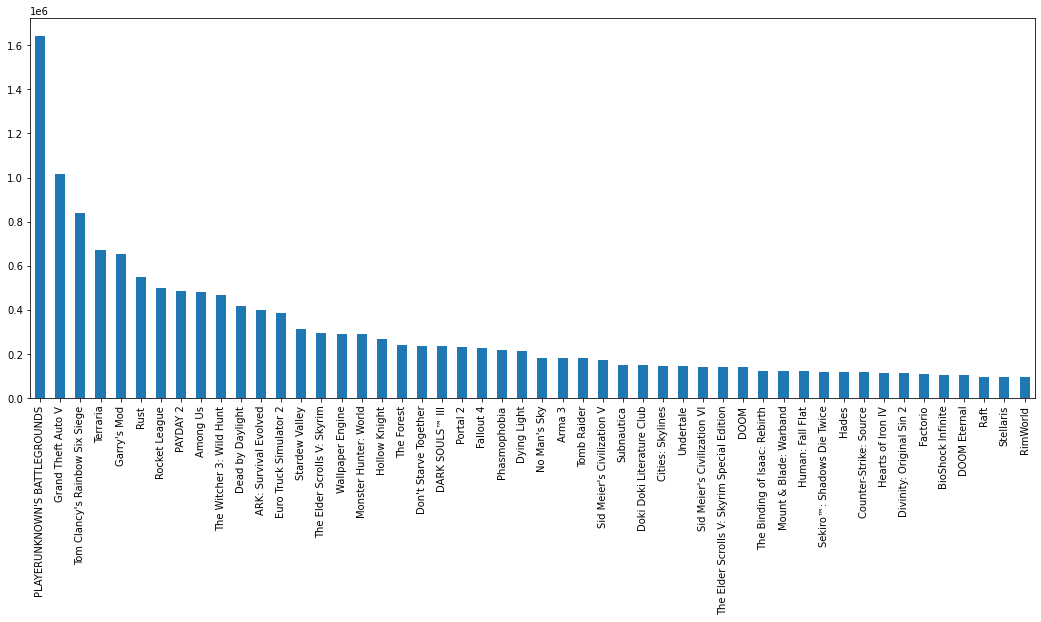

In [31]:
n_reviews_per_app[0:50].plot.bar(figsize=(18,7)) 

#### RQ 2.2 - APPS WITH THE BEST Weighted Vote Score?

In [32]:
#for each application the highest weighted_vote_score
data.groupby("app_name").weighted_vote_score.max()

app_name
20XX                                    0.933389
A Hat in Time                           0.960150
A Short Hike                            0.931559
A Way Out                               0.936102
ARK: Survival Evolved                   0.981134
                                          ...   
XCOM 2                                  0.960939
Yakuza 0                                0.990103
Youtubers Life                          0.939689
theHunter: Call of the Wild™            0.987502
三国群英传8 Heroes of the Three Kingdoms 8   0.955287
Name: weighted_vote_score, Length: 315, dtype: float64

We were asked to find out which applications had the best *weighted_vote_score*. In the first moment we decided to compute for each app the highest weighted vote score value, but we didn't consider that in this way it is muche easier to encounter outliers that would affect our analysis. 
So, we change our idea, and decide to consider as "applications with the best *weighted_vote_score* the apps with the higher *weighted_vote_score* mean. 

In [33]:
#for each application the avg weighted_vote_score
avg_wvs=data.groupby("app_name").weighted_vote_score.mean()
avg_wvs

app_name
20XX                                    0.209669
A Hat in Time                           0.167795
A Short Hike                            0.138614
A Way Out                               0.161408
ARK: Survival Evolved                   0.193318
                                          ...   
XCOM 2                                  0.174430
Yakuza 0                                0.197338
Youtubers Life                          0.250953
theHunter: Call of the Wild™            0.181929
三国群英传8 Heroes of the Three Kingdoms 8   0.120984
Name: weighted_vote_score, Length: 315, dtype: float64

In [34]:
avg_wvs.sort_values(ascending=False)

app_name
Hunt Down The Freeman               0.501874
Urban Empire                        0.438582
METAL GEAR SURVIVE                  0.421726
Identity                            0.415280
Umbrella Corps                      0.414151
                                      ...   
There Is No Game: Wrong Dimension   0.085903
Bloons TD 6                         0.085018
People Playground                   0.083553
Among Us                            0.078406
Totally Accurate Battle Simulator   0.077028
Name: weighted_vote_score, Length: 315, dtype: float64

From the output, we notice that the top5 apps with the highest *weighted_vote_score* are:
1. Hunt Down The Freeman                0.502150
2. Urban Empire                         0.438623
3. METAL GEAR SURVIVE                   0.421632
4. Identity                             0.415384
5. Umbrella Corps                       0.414678

#### RQ 2.3 - APPS WITH THE MOST AND LEAST RECOMMENDATION

In [35]:
#number of recommendation per app
n_rec=data.groupby('app_name')['recommended'].apply(lambda x: x[x == True].count())
n_rec

app_name
20XX                                       3343
A Hat in Time                             34279
A Short Hike                               5795
A Way Out                                  9753
ARK: Survival Evolved                    314118
                                          ...  
XCOM 2                                    52580
Yakuza 0                                  29736
Youtubers Life                             9513
theHunter: Call of the Wild™              57306
三国群英传8 Heroes of the Three Kingdoms 8      4674
Name: recommended, Length: 315, dtype: int64

In [36]:
n_rec_sorted=n_rec.sort_values(ascending=False)
n_rec_sorted

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     885189
Grand Theft Auto V                828903
Tom Clancy's Rainbow Six Siege    740479
Terraria                          657385
Garry's Mod                       630931
                                   ...  
Out of the Park Baseball 19          594
Shadow Complex Remastered            587
Identity                             439
DRAGON QUEST HEROES™ II              423
Neon Hardcorps                        88
Name: recommended, Length: 315, dtype: int64

In [37]:
top5_rec=n_rec_sorted[0:5]
top5_rec

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     885189
Grand Theft Auto V                828903
Tom Clancy's Rainbow Six Siege    740479
Terraria                          657385
Garry's Mod                       630931
Name: recommended, dtype: int64

In [38]:
print(f"The top 5 apps that have the higher number of recommendations are {top5_rec}")

The top 5 apps that have the higher number of recommendations are app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     885189
Grand Theft Auto V                828903
Tom Clancy's Rainbow Six Siege    740479
Terraria                          657385
Garry's Mod                       630931
Name: recommended, dtype: int64


In [39]:
least_5_rec=n_rec_sorted[310:315]
least_5_rec

app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  88
Name: recommended, dtype: int64

In [40]:
print(f"The top 5 apps that have the least number of recommendations are {least_5_rec}")

The top 5 apps that have the least number of recommendations are app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  88
Name: recommended, dtype: int64


We decided to see also the amount of non recommendation per app just to complete the analysis.

In [41]:
#number of non recommendation per app
n_not_rec=data.groupby('app_name')['recommended'].apply(lambda x: x[x == False].count())
n_not_rec

app_name
20XX                                       261
A Hat in Time                              660
A Short Hike                                50
A Way Out                                 1174
ARK: Survival Evolved                    84333
                                         ...  
XCOM 2                                    8873
Yakuza 0                                  2000
Youtubers Life                            3040
theHunter: Call of the Wild™              9773
三国群英传8 Heroes of the Three Kingdoms 8     3433
Name: recommended, Length: 315, dtype: int64

In [42]:
not_rec_app_sorted=n_not_rec.sort_values(ascending=False)
not_rec_app_sorted

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS      757442
Grand Theft Auto V                 187469
Tom Clancy's Rainbow Six Siege      99359
ARK: Survival Evolved               84333
Rust                                80044
                                    ...  
Nova Drift                             65
A Short Hike                           50
Senren＊Banka                           30
ULTRAKILL                              26
Don't Escape: 4 Days to Survive        15
Name: recommended, Length: 315, dtype: int64

Is interesting to notice that the 3 most recommended apps are also the top 3 apps with negative recommendations.

#### RQ 2.4 - NUMBER OF APPS PURCHASED AND GIVEN FOR FREE

In [43]:
#number of apps purchased
app_purchased=len(data[data['steam_purchase']== True])
app_purchased

16796130

In [44]:
print(f"The number of purchased apps is {app_purchased}.")

The number of purchased apps is 16796130.


In [45]:
#number of apps received for free
app_free=len(data[data['received_for_free']==True])
app_free

686443

Now we want to check if the number of purchased and received for free apps corresponds to the number of reviews of the dataset. 

In [46]:
app_free+app_purchased

17482573

From this output, we find out that there is a difference between the number of reviews and the number of purchased/received for free apps. We imagine that some author maybe already had the game they reviews, or maybe wrote a review without having played at the game, or maybe didn't purchased the game directly on steam, but on another platform.

### [RQ3] Now it's important to understand the preferred time to do reviews.

What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [115]:
time_intervals = pd.read_excel('time_interval_cami2.xlsx', header='infer' )
time_intervals

,Initial time,Final time
0,06:00:00,10:59:59
1,11:00:00,13:59:59
2,14:00:00,16:59:59
3,17:00:00,19:59:59
4,20:00:00,23:59:59
5,00:00:00,02:59:59
6,03:00:00,05:59:59


In [89]:
# create a dataframe with datetime and review id
c = pd.DataFrame(data['timestamp_created'])
c['new_date'] = [d.date() for d in data['timestamp_created']]
c['new_time'] = [d.time() for d in data['timestamp_created']]
c['new_time']

0           06:00:29
1           05:50:30
2           05:46:40
3           05:32:50
4           05:23:47
              ...   
21747366    18:05:04
21747367    18:04:53
21747368    18:04:33
21747369    18:03:51
21747370    18:01:45
Name: new_time, Length: 21687951, dtype: object

remember that a record corresponds to a review

In [118]:
init = list(time_intervals['Initial time'])
final = list(time_intervals['Final time'])
list_time_intervals = []
for i in range(len(init)):
    for j in range(len(final)):
        if i == j:
            list_time_intervals.append([datetime.strptime(init[i], '%H:%M:%S').time(),datetime.strptime(final[j], '%H:%M:%S').time()])
list_time_intervals

[[datetime.time(6, 0), datetime.time(10, 59, 59)],
 [datetime.time(11, 0), datetime.time(13, 59, 59)],
 [datetime.time(14, 0), datetime.time(16, 59, 59)],
 [datetime.time(17, 0), datetime.time(19, 59, 59)],
 [datetime.time(20, 0), datetime.time(23, 59, 59)],
 [datetime.time(0, 0), datetime.time(2, 59, 59)],
 [datetime.time(3, 0), datetime.time(5, 59, 59)]]

In [119]:
def num_reviews_per_time(t_intervals):
    rev_count = {}
    for i in range(len(t_intervals)):
        rev_count[t_intervals[i][0],t_intervals[i][1]]=0
        for time_rev in c['new_time']:
            if t_intervals[i][0] <= time_rev <= t_intervals[i][1]:
                rev_count[t_intervals[i][0],t_intervals[i][1]] += 1
    return rev_count 

In [120]:
k = num_reviews_per_time(list_time_intervals)
k

{(datetime.time(6, 0), datetime.time(10, 59, 59)): 3915909,
 (datetime.time(11, 0), datetime.time(13, 59, 59)): 2964185,
 (datetime.time(14, 0), datetime.time(16, 59, 59)): 3368161,
 (datetime.time(17, 0), datetime.time(19, 59, 59)): 3247872,
 (datetime.time(20, 0), datetime.time(23, 59, 59)): 3606292,
 (datetime.time(0, 0), datetime.time(2, 59, 59)): 2345145,
 (datetime.time(3, 0), datetime.time(5, 59, 59)): 2240387}

In [121]:
review_time = list(num_reviews_per_time(list_time_intervals).values())
lb = [list_time_intervals[i][0] for i in range(len(list_time_intervals))]
ub = [list_time_intervals[i][1] for i in range(len(list_time_intervals))]
review_time

[3915909, 2964185, 3368161, 3247872, 3606292, 2345145, 2240387]

In [122]:
rev_int = pd.DataFrame(index = [lb,ub], columns = ['count'])
j = list(k.values())
rev_int['count'] = j
rev_int

,,count
06:00:00,10:59:59,3915909
11:00:00,13:59:59,2964185
14:00:00,16:59:59,3368161
17:00:00,19:59:59,3247872
20:00:00,23:59:59,3606292
00:00:00,02:59:59,2345145
03:00:00,05:59:59,2240387


Text(0, 0.5, 'reviews per interval')

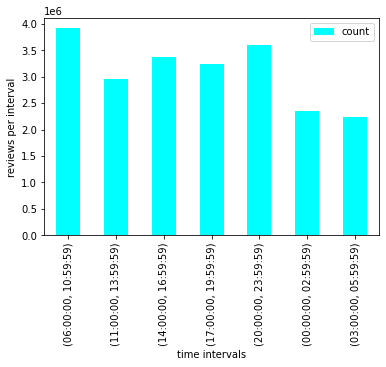

In [123]:
rev_int.plot(kind ='bar',color = 'cyan')
plt.xlabel("time intervals")
plt.ylabel('reviews per interval')

### [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

What are the top 3 languages used to review applications?
Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

#### RQ 4.1 - TOP 3 LANGUAGES USED

In [50]:
data['language'].value_counts() #using value_counts the value are sorted

english       9606842
schinese      3758222
russian       2342828
brazilian      835949
spanish        811599
german         749869
turkish        634369
koreana        612538
french         538829
polish         493640
tchinese       217692
czech          133300
italian        132932
thai           127214
japanese        81570
portuguese      81083
swedish         79794
dutch           77264
hungarian       70644
latam           70036
danish          55611
finnish         54471
norwegian       36646
romanian        32586
ukrainian       21077
greek           14373
bulgarian       10403
vietnamese       6570
Name: language, dtype: int64

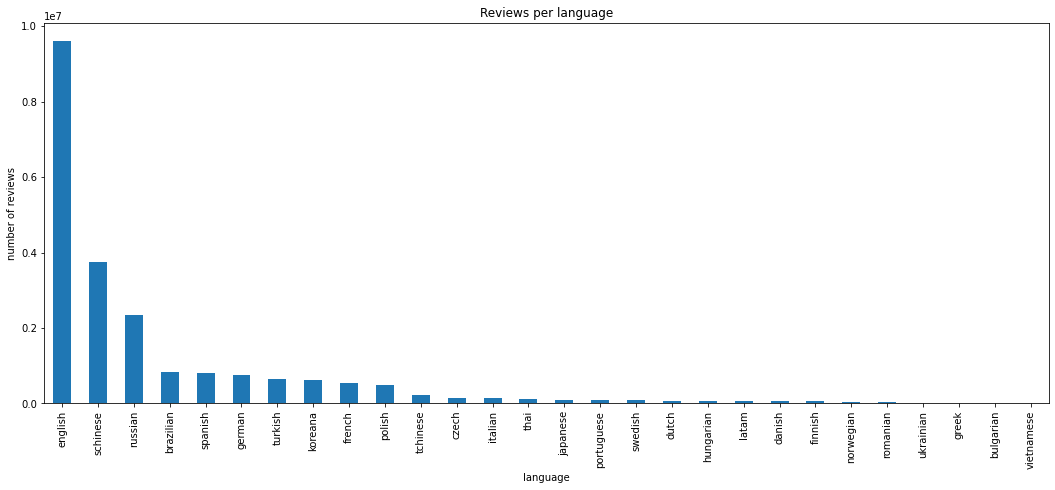

In [51]:
data['language'].value_counts().plot.bar(figsize=(18,7), xlabel='language', ylabel='number of reviews', title = 'Reviews per language')

As we can see both from the output of the code and from the plot, the top three languages used are english (9635437), schinese (3764967) and russian (2348900).

#### RQ 4.2 - FUNCTION FILTER DATASET ON LANGUAGE

In [52]:
def filter_data_on_language(dataset, languages) :
    return dataset[dataset['language'].isin(languages)]

In [53]:
languages=['english', 'schinese', 'russian']

In [54]:
new_df=filter_data_on_language(data, languages)
new_df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.000000,1448.000000,1909.000000,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.000000,2743.000000,2674.000000,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.000000,1061.000000,1060.000000,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.000000,3200.000000,5524.000000,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.000000,42.000000,217.000000,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,...,True,False,False,76561197967033932,431,7,432.000000,0.000000,29.000000,2020-04-11 17:56:56
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,...,False,False,False,76561198046495482,70,10,3296.000000,15.000000,24.000000,2021-01-19 18:17:11
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,...,True,False,False,76561198176379749,79,17,2654.000000,0.000000,34.000000,2020-06-08 16:29:13
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,...,True,False,False,76561198041763187,140,3,210.000000,0.000000,12.000000,2020-05-17 11:36:55


#### RQ 4.3 - PERCENTAGE OF FUNNY VOTES ON NEW DF FILTERED ON LAGUAGES

In [55]:
n_funny=len(new_df[new_df['votes_funny']>=1])
n_funny

1918752

In [56]:
perc_funny=n_funny/len(new_df)*100
perc_funny

12.215210035821483

In [57]:
perc_not_funny= 100-perc_funny
perc_not_funny

87.78478996417851

The 12.2% of the reviews of the reviews filtered on the top 3 languages were voted funny. 

Now, it would be interesting to see the distribution per language; we decided to report also this analysis. 

In [58]:
n_funny_language=new_df.groupby('language')['votes_funny'].apply(lambda x: x[x >= 1].count())
n_funny_language

language
english     1083556
russian      391018
schinese     444178
Name: votes_funny, dtype: int64

In [59]:
perc_funny_language=n_funny_language/len(new_df)*100
perc_funny_language

language
english    6.898163
russian    2.489309
schinese   2.827738
Name: votes_funny, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

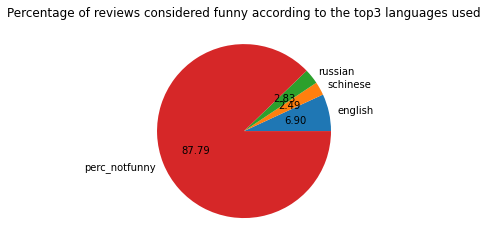

In [60]:
labels=['english', 'schinese', 'russian', 'perc_notfunny']
perc_notfunny=100-perc_funny
funny_perc_language=[6.895524, 2.487627, 2.825172, perc_notfunny]

plt.title('Percentage of reviews considered funny according to the top3 languages used')
plt.pie(funny_perc_language, labels=labels, autopct='%1.2f')
plt.show

#### RQ 4.4 - PERCENTAGE OF HELPFUL VOTES ON NEW DF FILTERED ON LAGUAGES

In [61]:
n_helpful=len(new_df[new_df['votes_helpful']>=1])
n_helpful

4583438

In [62]:
perc_helpful=n_helpful/len(new_df)*100
perc_helpful

29.179204949970373

The 29.2% of the reviews were voted as helpful. 

As we did in the prevoius point, we will report also the analysis per language.

In [63]:
n_helpful_language=new_df.groupby('language')['votes_helpful'].apply(lambda x: x[x >= 1].count())
n_helpful_language

language
english     2807795
russian      832217
schinese     943426
Name: votes_helpful, dtype: int64

In [64]:
perc_helpful_language=n_helpful_language/len(new_df)*100
perc_helpful_language

language
english    17.875059
russian     5.298082
schinese    6.006064
Name: votes_helpful, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

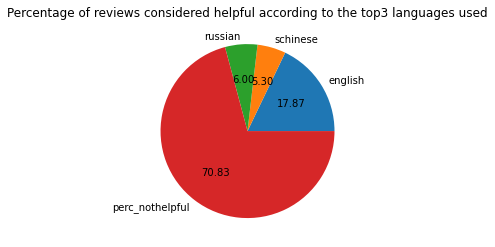

In [65]:
labels=['english', 'schinese', 'russian', 'perc_nothelpful']
perc_nothelpful=100-perc_helpful
helpful_perc_language=[17.866650, 5.294812, 6.001262, perc_nothelpful]

plt.title('Percentage of reviews considered helpful according to the top3 languages used')
plt.pie(helpful_perc_language, labels=labels, autopct='%1.2f')
plt.show

Thanks to this plot we can see that 17.87% voted helpful are reviewed in english, il 6% in russian, il 5.30% in schinese. 

### [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.


Plot the top 10 most popular reviewers and the number of reviews.
What applications did the most popular author review?
How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

#### RQ 5.1 - TOP 10 POPULAR REVIERS AND NUMBER OF REVIEWS

In [66]:
#n reviews per steamid -- most popular reviewers = the one which have the highest number of reviews 
numreviews_per_author=data['author.steamid'].value_counts()
numreviews_per_author

76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
                    ... 
76561198253020754      1
76561198109326238      1
76561198322721026      1
76561198016622209      1
76561198046495482      1
Name: author.steamid, Length: 12381952, dtype: int64

In [67]:
author_topten=numreviews_per_author[0:10]
author_topten

76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     91
76561197969749884     88
76561197989746995     86
Name: author.steamid, dtype: int64

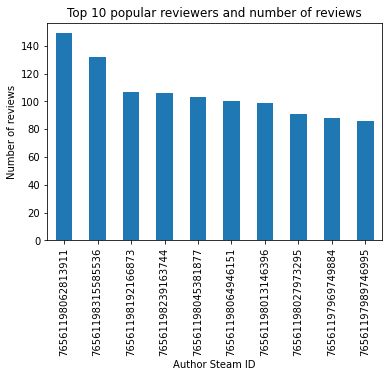

In [68]:
author_topten.plot.bar(xlabel='Author Steam ID', ylabel='Number of reviews', 
                       title='Top 10 popular reviewers and number of reviews')

#### RQ 5.2 - What applications did the most popular author review?

In [69]:
numreviews_per_author=data['author.steamid'].value_counts()
numreviews_per_author.head(1)
#here we knew that the most popular author is 76561198062813911

76561198062813911    149
Name: author.steamid, dtype: int64

In [70]:
data[['author.steamid', 'app_name']]

,author.steamid,app_name
0,76561199095369542,The Witcher 3: Wild Hunt
1,76561198949504115,The Witcher 3: Wild Hunt
2,76561199090098988,The Witcher 3: Wild Hunt
3,76561199054755373,The Witcher 3: Wild Hunt
4,76561199028326951,The Witcher 3: Wild Hunt
...,...,...
21747366,76561197967033932,Half-Life: Alyx
21747367,76561198046495482,Half-Life: Alyx
21747368,76561198176379749,Half-Life: Alyx
21747369,76561198041763187,Half-Life: Alyx


In [71]:
#here by knowing the most popular author review we can define which 
#apps he reviewed
data.loc[data['author.steamid']==76561198062813911, 'app_name']


512675                     Half-Life
539037        Counter-Strike: Source
658130      Half-Life 2: Episode Two
849477                      Portal 2
1549581                  Garry's Mod
                      ...           
21578107               Hollow Knight
21624890               Day of Infamy
21651066                  SimAirport
21656340               Dead Rising 4
21672218    Styx: Shards of Darkness
Name: app_name, Length: 149, dtype: object

#### RQ 5.3 - NUMBER AND PERCENTAGE OF PURCHASED APPS AND OF FREE APPS OF THE MOST POPULAR AUTHOR

In [72]:
top_author_purchase=data[(data['author.steamid'] == 76561198062813911) & (data['steam_purchase']==True)]
print(len(top_author_purchase), 'number of purchases')
#number he made purchase =110

110 number of purchases


In [74]:
tt_purchase_ofall=data.loc[data['author.steamid']== 76561198062813911, 'steam_purchase']
print(len(tt_purchase_ofall),'is total number of values in steam_purchase')
#we got all values as well as true and false

149 is total number of values in steam_purchase


In [76]:
percent=len(top_author_purchase)*100/len(tt_purchase_ofall)
print(percent,'% he made positive purchase')

73.8255033557047 % he made positive purchase


In [77]:
top_author_free=data[(data['author.steamid'] == 76561198062813911) & (data['received_for_free']==True)]
print(len(top_author_free),'is the number of free apps he received')
#it is the number of free purchases =4

4 is the number of free apps he received


In [78]:
tt_free_ofall=data.loc[data['author.steamid']== 76561198062813911, 'received_for_free']
print(len(tt_free_ofall),'is total number of values in received_for_free')
#total number of received_for_free

149 is total number of values in received_for_free


In [79]:
percent_of_free=len(top_author_free)*100/len(tt_free_ofall)
print(percent_of_free,'% he received for free')

2.684563758389262 % he received for free


#### RQ 5.4 - N. OF APPS REVIEWED POSITIVELY AND NEGATIVELY

In [80]:
top_author_review_pos_purchase=data[(data['author.steamid'] == 76561198062813911) & (data['steam_purchase']==True) & (data['recommended']==True)]
print(len(top_author_review_pos_purchase),'he purchased reviewed positively')

108 he purchased reviewed positively


In [81]:
top_author_review_neg_purchase=data[(data['author.steamid'] == 76561198062813911) & (data['steam_purchase']==True) & (data['recommended']==False)]
print(len(top_author_review_neg_purchase),'he purchased reviewed negatively')

2 he purchased reviewed negatively


In [82]:
top_author_review_pos_free=data[(data['author.steamid'] == 76561198062813911) & (data['received_for_free']==True)& (data['recommended']==True)]
print(len(top_author_review_pos_free),'he received for free reviewed positively')

4 he received for free reviewed positively


In [83]:
top_author_review_neg_free=data[(data['author.steamid'] == 76561198062813911) & (data['received_for_free']==True)& (data['recommended']==False)]
print(len(top_author_review_neg_free),'he received for free reviewed negatively')

0 he received for free reviewed negatively


### [RQ6]  It's time to get information from the updates that a user does to his reviews.

#### RQ 6.1 - AVG TIME BEFORE UPDATING A REVIEW

In [124]:
#we are calculating the time it spent from when the review was 
#created to when it was updated 
duration=data['timestamp_updated']-data['timestamp_created']
print(duration)

0           0 days 00:00:00
1           0 days 00:00:00
2           0 days 00:00:00
3           0 days 00:00:00
4           0 days 00:00:00
                 ...       
21747366    0 days 00:00:00
21747367    0 days 00:00:00
21747368    0 days 00:00:00
21747369   16 days 03:43:11
21747370   81 days 21:04:55
Length: 21687951, dtype: timedelta64[ns]


In [125]:
#the average of updating the reviews
upd_mean=duration.mean()
upd_mean

Timedelta('36 days 04:59:57.478384160')

The average time it passes before a review is updated is of 36 days, and nearly 5 hours.

#### RQ 6.2 - TOP 3 AUTHORS THAT USUALLY UPDATE THEIR REVIEWS

In [126]:
num_upd_per_author1=data['timestamp_updated'].value_counts()
author_topthree1=num_upd_per_author1[0:3]
author_topthree1


2018-11-22 15:54:53    256
2017-11-23 17:56:41    120
2017-11-23 17:53:12    101
Name: timestamp_updated, dtype: int64

In [127]:
#getting which were updated by checking it by condition like above and seeing which one 
#repeating and getting top 3

tt=data.loc[data['timestamp_updated']!=data['timestamp_created'], 'author.steamid']
top=tt.value_counts()
top1=top[0:3]
top1

76561198192166873    95
76561198206999976    61
76561198072450805    60
Name: author.steamid, dtype: int64

The top 3 author that usually update their review are the one with the following steamid:
1. 76561198192166873 with 95 updates
2. 76561198206999976 with 61 updates
3. 76561198072450805 with 60 updates

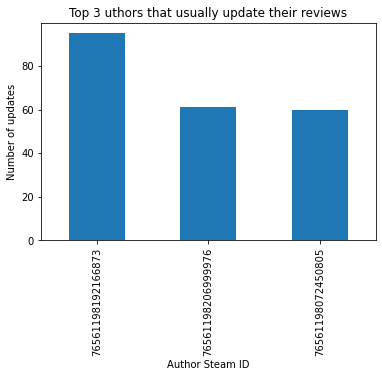

In [128]:
top1.plot.bar(xlabel='Author Steam ID', ylabel='Number of updates', title='Top 3 uthors that usually update their reviews')

### [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

#### RQ 7.1 - PROBABILITY THAT *WEIGHTED_VOTE_SCORE* >= 0.5

To compute the probability that a review has a Weighted Vote Score equal or bigger than 0.5 we can consider the classical definition of probability. So this probability is equal to the number of reviews that have a Weighted Vote Score equal or bigger than 0.5 over the total number of reviews. 

In [129]:
n_big_wvs=data.loc[(data['weighted_vote_score'] >= 0.5)].shape[0]
n_big_wvs

4775651

In [130]:
n_reviews=len(data.weighted_vote_score)
n_reviews

21687951

In [131]:
prob_big_wvs = n_big_wvs/n_reviews
prob_big_wvs

0.22019834884355835

So, the probability that a review has a weighted vote score equal to or bigger than 0.5 is 0.22. 

#### RQ 7.2 - Probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

The conditional probability is given by the following: $$ P(A|B)=\frac{P(A \cap B)}{P(B)}$$. 

To simplify, we consider only the variables we're interested in. So we create new boolean columns in the dataset that have value of 1 if the review has at least one vote as funny. 

In [132]:
pd.options.mode.chained_assignment = None

In [133]:
data['one_funny_or_more'] = np.where(data['votes_funny']>=1, 1, 0)

In [134]:
data['wvs_bigger_0.5'] = np.where(data['weighted_vote_score']>0.5, 1, 0)

In [135]:
data['count']=1

Now we create a new dataframe dropping all the columns we don't need.

In [137]:
new_df_prob=data[['one_funny_or_more', 'wvs_bigger_0.5', 'count']]
new_df_prob.head()

,one_funny_or_more,wvs_bigger_0.5,count
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [138]:
len(new_df_prob)

21687951

We then create a pivot table to summarize all the data we need to compute the probabilities.

In [139]:
pd.pivot_table(new_df_prob, values='count', index=['one_funny_or_more'], columns=['wvs_bigger_0.5'],
               aggfunc=np.size, fill_value=0)

wvs_bigger_0.5,0,1
one_funny_or_more,,
0,15612429,3477618
1,1439726,1158178


In [140]:
p_funny=(1439726+1158178)/(15612429+3477618+1439726+1158178)
p_funny

0.1197855897037023

In [141]:
p_wvs_bigger_0_5=(3477618+1158178)/(15612429+3477618+1439726+1158178)
p_wvs_bigger_0_5

0.2137498374097212

In [142]:
p_funny_and_wvs_bigger=1158178/(15612429+3477618+1439726+1158178)
p_funny_and_wvs_bigger

0.05340190965942333

In [143]:
cond_prob=p_funny_and_wvs_bigger/p_wvs_bigger_0_5
cond_prob

0.24983368552024288

So the probability of getting at least one vote funny given that the weighted vote score is bigger than 0.5 is 25%. 

#### RQ 7.3 - Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Now, to check if “a review has at least one vote as funny” is independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5” we can verify the condition of probability independence, that is: $$ P(A \cap B)=P(A)*P(B) $$

Now, we will do the same steps as the previous point, but considering the *weighted vote score* equal or bigger than 0.5.

In [144]:
data['wvs_bigger_equal_0.5'] = np.where(data['weighted_vote_score']>=0.5, 1, 0)

In [145]:
data['one_funny_or_more'] = np.where(data['votes_funny']>=1, 1, 0)

In [146]:
data['count']=1

In [147]:
new_df_prob_2=data[['one_funny_or_more', 'wvs_bigger_equal_0.5', 'count']]
new_df_prob_2.head()

,one_funny_or_more,wvs_bigger_equal_0.5,count
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [148]:
pd.pivot_table(new_df_prob_2, values='count', index=['one_funny_or_more'], columns=['wvs_bigger_equal_0.5'],
               aggfunc=np.size, fill_value=0)

wvs_bigger_equal_0.5,0,1
one_funny_or_more,,
0,15504453,3585594
1,1407847,1190057


In [149]:
#prob that the wvs score is bigger or equal to 0.5 AND at least one vote funny
p_wvs_bigger_equal_and_funny=1191916/(15552123+3592176+1411156+1191916)
p_wvs_bigger_equal_and_funny

0.05480736039312522

In [150]:
#prob that wvs score is bigger or equal to 0.5
p_wvs_bigger_equal=(3592176+1191916)/(15552123+3592176+1411156+1191916)
p_wvs_bigger_equal

0.21998484322541792

In [151]:
#check if the condition is verified 
p_funny*p_wvs_bigger_equal_and_funny==p_funny_and_wvs_bigger

False

Since this condition is not verified, the two events are not independent from each other. 

### [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

#### RQ 8.1 - Difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [152]:
df_lan_wvs = data[['language','weighted_vote_score']]
df_lan_wvs

,language,weighted_vote_score
0,schinese,0.000000
1,schinese,0.000000
2,schinese,0.000000
3,english,0.000000
4,schinese,0.000000
...,...,...
21747366,english,0.000000
21747367,english,0.000000
21747368,english,0.474138
21747369,english,0.386022


In [153]:
chi_rus = data[(data.language=='schinese') | (data.language=='russian')].groupby('language').weighted_vote_score.describe()
chi_rus

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
russian,2342828.000000,0.213616,0.257783,0.000000,0.000000,0.000000,0.505300,0.989523
schinese,3758222.000000,0.145538,0.239511,0.000000,0.000000,0.000000,0.476190,0.995987


Text(0.5, 0.4, 'count chinese = 3764967.0')

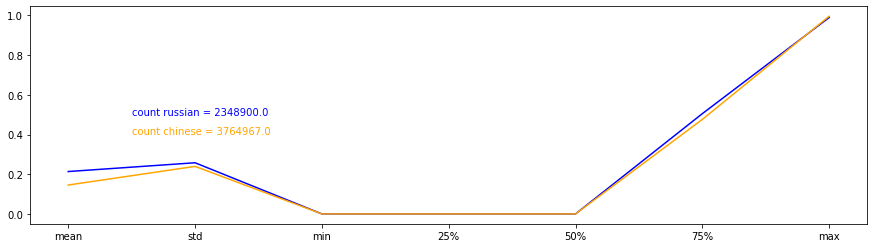

In [133]:
chi_rus.iloc[0,1:].plot(figsize = (15,4), color = 'blue')
chi_rus.iloc[1,1:].plot(figsize = (15,4), color = 'orange')
plt.annotate("count russian = {}".format(chi_rus.iloc[0,0]), xy = (0.5,0.5), color = 'blue')
plt.annotate("count chinese = {}".format(chi_rus.iloc[1,0]), xy = (0.5,0.4), color = 'orange')

To check if there are significant differences between the weighted vote score written in chinese and the one written in russian, we compute a t-test using the scipy.stats.ttest_ind function.

In [137]:
chinese_wvs = [data.loc[i, "weighted_vote_score"] for i in range(len(data["weighted_vote_score"])) if data.loc[i,"language"] == "schinese"]
russian_wvs = [data.loc[i, "weighted_vote_score"] for i in range(len(data["weighted_vote_score"])) if data.loc[i,"language"] == "russian"]
scipy.stats.ttest_ind(chinese_wvs, russian_wvs)

Ttest_indResult(statistic=-331.415758641803, pvalue=0.0)

The t-test quantifies the difference between the means of the two samples (weighted_vote_score in chinese and in russian). The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true $ (H_0: µ_1 - µ_2 = 0) $. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.
In this case p-value = 0.0, that's mean that we have evidence against the null hypothesis, so we can conclude that the mean of the russian wvs and the chinese wvs are not the same.

The amount of reviews written in chinese is much higher than the one written in russian. We are doing some basic statistics on samples of different numerosity. 
We observe that there are not stronger differences between the two lines.


#### RQ 8.2 - Time a user lets pass before updating the review is timestamp_updated - timestamp_created.

For each review, we compute this interval, and use the pearson coefficient to evaluate any possible correlation between that interval and the weighted vote score, r is a very small number so we can assume that there is no correlation between the interval a user lets pass before he update the review and the weighted vote score. In addition, we can consider this analysis pretty reliable, since the values are sufficiently concentrated around the mean. We computed the scatter plot to give a graphical idea.

In [154]:
duration=data['timestamp_updated']-data['timestamp_created']
duration_in_sec=duration.dt.total_seconds()
duration_in_sec

0                0.000000
1                0.000000
2                0.000000
3                0.000000
4                0.000000
                ...      
21747366         0.000000
21747367         0.000000
21747368         0.000000
21747369   1395791.000000
21747370   7074295.000000
Length: 21687951, dtype: float64

In [155]:
int_updating = pd.DataFrame(columns = ['duration_in_sec', 'weighted_vote_score'])
int_updating['duration_in_sec'] = duration_in_sec
int_updating['weighted_vote_score'] = data['weighted_vote_score']
int_updating

,duration_in_sec,weighted_vote_score
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
21747366,0.000000,0.000000
21747367,0.000000,0.000000
21747368,0.000000,0.474138
21747369,1395791.000000,0.386022


In [156]:
x = np.array(int_updating["duration_in_sec"])
y = np.array(int_updating["weighted_vote_score"])
r = int_updating['duration_in_sec'].corr(int_updating['weighted_vote_score'])
r

0.07207335352704707

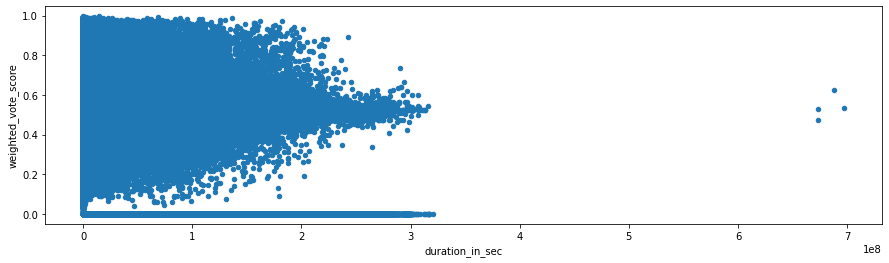

In [142]:
int_updating.plot.scatter(x = 'duration_in_sec',y = 'weighted_vote_score',figsize = (15,4))

Both from the value of the correlation and by visualizing the scatter plot we notice that there is no correlation between the *weighted_vote_score* and the *time between the creation and the update of a review*. Infact the pearson correlation is very close to 0, and the scatter plot doesn't explain anything. 

We are aware of the fact that most of the reviews weren't updated so most of the duration is equal to 0. For this reason, we believe that it could be helpful to considerr only the reviews which had an update and check what would change.

In [157]:
x = int_updating[(int_updating['duration_in_sec'] > 0)]
x

,duration_in_sec,weighted_vote_score
13,71.000000,0.000000
27,10765.000000,0.784226
39,69.000000,0.000000
41,2345.000000,0.000000
51,51.000000,0.000000
...,...,...
21747356,602648.000000,0.191392
21747357,2908.000000,0.619158
21747362,138672.000000,0.521739
21747369,1395791.000000,0.386022


In [158]:
r1 = x['duration_in_sec'].corr(x['weighted_vote_score'])
r1

-0.03618286144999928

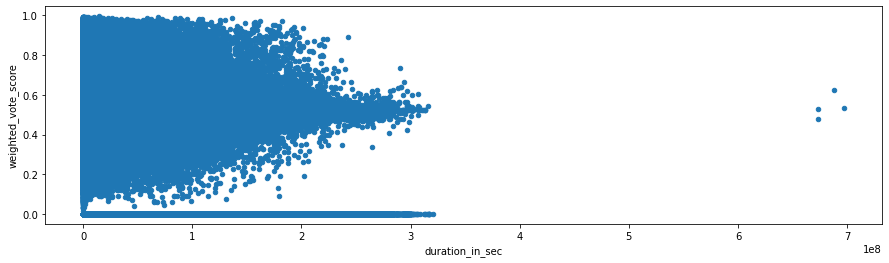

In [159]:
x.plot.scatter(x = 'duration_in_sec',y = 'weighted_vote_score',figsize = (15,4))

#### RQ 8.3 - Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? 

In [160]:
recomm = []
for i in data["recommended"]:
    if i == True:
        recomm.append(1)
    else:
        recomm.append(0)
reco = pd.DataFrame(columns = ["duration_in_sec", "recommended"])
reco["duration_in_sec"] = int_updating["duration_in_sec"]
reco["recommended"] = recomm
reco

,duration_in_sec,recommended
0,0.000000,1
1,0.000000,1
2,0.000000,1
3,0.000000,1
4,0.000000,1
...,...,...
21747366,0.000000,1
21747367,0.000000,1
21747368,0.000000,1
21747369,1395791.000000,1


In [161]:
r2 = reco["duration_in_sec"].corr(reco["recommended"])
r2

-0.028592569308459718

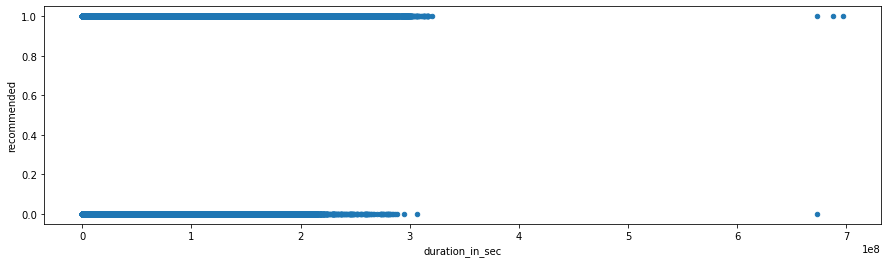

In [154]:
reco.plot.scatter(x = 'duration_in_sec',y = 'recommended',figsize = (15,4))

By doing a correlation analysis we conclude that there is no correlation between the duration_in_sec and the recommended count. So, we will try to see if there is a linear dependence between these two variables through a linear regression model and checking the R-Squared value. With this model we want to see if when the duration grows, also the recommended value increases. 

In [164]:
duration_in_sec=np.array(reco['duration_in_sec']).reshape((-1, 1))
recommended=np.array(reco['recommended'])

In [165]:
model = LinearRegression().fit(duration_in_sec, recommended)

In [166]:
r_sq = model.score(duration_in_sec, recommended)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0008175350196618636


The coefficient of determination is very close to 0, which means that the data doesn't fit the model. For this reason we confirm that there is no linear relationship nor correlation between the two variables.

#### RQ 8.4 - HISTOGRAMS, BARPLOTS, SCATTERPLOTS, PIECHARTS

We use histograms, bar plots, scatterplots and pie charts as a way to explain data; bar charts and pie charts are mostly used for categorical data, which may be divided into groups because they assume values in a discete set. Pie charts show each value in relation with the whole, while bar plots show the values of the categorical variable on x-axis, and their frequency on the other.
Indeed, histograms are for displaying quantitive data, after collecting data from a population, we split them into intervals we report on the x-axis, while on the y-axis it is shown the frequency or count. Intervals can be of different width, if so, it is represented by a different width of the bins.
Lastly, scatterplots are used to represent a correlation between two variables, data are displayed in a collection of points, which coordinates are determined by the values of the first and the second variable. If the two variables are dependent, we can see that the points follow a certain direction (depending on which type of dependance it is: linear, polynomial, etc).

#### 8.5 - INSIGHT FROM BOXPLOTS

Boxplots are useful to understand the distribution of the data, more in particular, they show the quartiles, so we can see where the values are centered (median = $q_2$), and also understand their spread via the $IQ = q_3 - q_1$ , the range (max-min) and so spot the outliers.
they are also useful to compare distributions.


### THEORETICAL QUESTIONS

#### TQ1

In [167]:
#Input: 
    #A: array of length n
    #k: integers between 1 and n
 
def alg(A, k):
    s = np.random.choice(A)  # 1 step
    L = [i for i in A if i <= s] # n step
    R = [i for i in A if i > s] # n step
    r = len(L) # 1 step
    if k == r: # 1 step
        return s 
    elif k < r:  
        return alg(L, k) 
    else:
        return alg(R, k - r) 

#### 1. What does the algorithm compute?
Given a list A of n elements and an integer k, the goal is to find the k-th smallest element of the list. The algorithm splits the list in two parts: L, containing the elements ≤ s and R containig the elements > s. The algorithm is computed again on both L and R, and it stops when k = r = len(L). 
If k = r, s will be the k-th smallest element of the list (example in the cell below).

example for question 1:
A = [1, 2, 4, 2, 3, 1, 5]
We can see that, sorting the list:
A_sorted = [1, 1, 2, 2, 3, 4, 5]

- 1st smallest element is 1 (k = 1) -> ERROR
- 2nd smallest element is 1 (k = 2) 
- 3rd smallest element is 2 (k = 3) -> ERROR
- 4th smallest element is 2 (k = 4)
- 5th smallest element is 3 (k = 5)
- 6th smallest element is 4 (k = 6)
- 7th smallest element is 5 (k = 7)

You can run it and see that, if k is 1 or 3, the algorithm gives an error because there are two numbers (1 and 2) that have duplicates, and once A is splitted in L and R, L will never be of lenght k (k will be always ≠ r) because it will contain the same element twice (in this example).

For example: if k = 1, the first smallest element of A is 1, suppose s = 2 => L = [1, 1, 2, 2], R = [3, 4, 5] and r = 4. In the first run k < r, so the algorithm is repeated on L, suppose now s = 1 => L' = [1, 1], 
R' = [2, 2] and r = 2 => k < r also this time, but we can see that r will never be 1, because L can't be splitted again (it contains the same element twice, so it will be at list of lenght 2), so the algorithm will give an error because it will never give back the first smallest element.

In [168]:
# example of k = 4: 2 is the 4th smallest element of A
alg([1, 2, 4, 2, 3, 1, 5], 4)

2

In [169]:
# example of worst case: maximum recursion depth exceeded
alg([1, 2, 4, 2, 3, 1, 5], 1)

RecursionError: maximum recursion depth exceeded while calling a Python object

#### 2. What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?
In the previous answer we saw that the worst case is the one in which k < r always, so the algorithm never stops. Particurarly, r = n-1 is the case in which A is splitted in the slowest way, so                          
    $T(n) = (2n+4) + T(n-1) = (2n+4) + (2(n-1)+4) + (2(n-2)+4) +...+2^{i}n + 4+...+ 2^{n}n + 4 = O(n)$   
    

#### 3. What is asymptotically the running time of the algorithm in the best case?
The best case is the one in which k = r, so the algorithm stops at the first 'if' and  $T(n) = 2n+4 = O(n)$

#### TQ2

#### 1) How much running time does it take to execute splitSwap(a, 0, n)?

T(n) = n + 2 T(n/2)
    
     = n +  2 [2 T(n/4) + n/2]
 
     = 2n + 4 T(n/4) 

     = 2n + 4 [2 T(n/8) + n/4] 

     = 3n + 8 T(n/8)

     = 4n + 16 T(n/16) 

     = k n + 2^k T(n/2^k)  =
[As we know that T(1)=1, this means we can do as follows:
    n/2^k=1 or n=2^k or log_2 n=k
so then we do as follows:]

         =(log_2 n) *n +2^(log_2 n)T(1)
         
         = n*log_2 n  + n
         
         =O(n logn) $
         
         
#### 2) What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

Let's start from function splitSwap, here we send array, index and n. Where we write the if condition, as n<=1, which will return the function again but size n is halved. And another return is to halve the n and add it to i. Which will be continued until n=1 (length of sub-array =1). Then we move to swapList, where we swap elements until halved sub-array length. And it will arrive again to the first call but with new tmp. Algorithm is optimal.

### TQ3 - Knapsack problem

parameters:
- w_i weight of i-th object
- v_i value of i-th object
- W weIght budget

### First heuristic
Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded, suppose objects are numerated from 1 to n.

Example
- objects = [1, 2, 3, 4, 5]
- w = [5, 3, 4, 3, 1]
- v = [10, 20, 10, 3, 5]
- W = 10

1. Order them in increasing order of weight
- w_sorted = [1, 3, 3, 4, 5]
- obj_sorted = [5, 2, 4, 3, 1]

2. Visit them sequentially adding them to the solition as long as budget is not exceeded
- solution = [5, 2, 4]
- weight = 7 (if we added 3 to the solution it woulb be 11, so we stop at 4)
- value = 5+20+3 = 28

It's easy to see that this solution is not optimal, for example [2, 3, 4] is a better one: weight( [2,3,4] ) = 10 and value( [2,3,4] ) = 33.



### Second heuristic
Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded.

Example
- objects = [1, 2, 3, 4, 5]
- w = [5, 3, 4, 3, 1]
- v = [10, 20, 10, 3, 5]
- W = 10

1. Order them in decreasing order of values
- v_sorted = [20, 10, 10, 5, 3]
- obj_sorted = [2, 1, 3, 5, 4]

2. Visit them sequentially adding them to the solution if the budget is not exceeded
- solution = [2,1]
- weight = 8 (if we added 3 to the solution it woulb be 11, so we stop at 4)
- value = 20+10 = 30

It's easy to see that this solution is not optimal, for example [2, 3, 4] is a better one: weight( [2,3,4] ) = 10 and value( [2,3,4] ) = 33.

### Third heuristic
Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded.

Example
- objects = [1, 2, 3, 4, 5]
- w = [5, 3, 8, 1, 2]
- v = [10, 18, 32, 3, 4]
- W = 10
- v/w = [2, 6, 4, 3, 2]

1. Order them in decreasing order of relative value
- w/v_sorted = [6, 4, 3, 2, 2]
- obj_sorted = [2, 3, 4, 1, 5]

2. Visit them sequentially adding them to the solution if the budget is not exceeded
- solution = [2]
- weight = 3 (if we added 3 to the solution it woulb be 11, so we stop at 2)
- value = 18

It's easy to see that this solution is not optimal, for example [1, 2, 5] is a better one: weight( [1,2,5] )=10 and value( [1,2,5] ) = 32.